In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dict_file = './results/test_results.npy'
# remove_keys = ['csense_t24_random-ddpg_ep_g1e2-original-914']

# dictionary = np.load(dict_file,allow_pickle='TRUE').item()
# for key in remove_keys:
#     if key in dictionary:
#         del dictionary[keys]
# np.save(dict_file,dictionary) 

In [3]:
results = np.load('./results/all_test_results.npy',allow_pickle='TRUE').item()

In [4]:
for key in results.keys():
    print(key)

renpv2_t24_random-g0.997-n0.7
csense_t24_random-base_g0.997-n0.7
rsense_t24_random-base_g0.997-n0.7
renp_t24_random-base_g0.997-n0.7
renpv2_t24_random-base_g0.997-n0.7
cenp_t24_random-base_g0.997-n0.7
cenpv2_t24_random-base_g0.997-n0.7


In [14]:
results['cenp_t24_random-base_g0.997-n0.7'].keys()

dict_keys([324267])

In [11]:
exp_list = [

'cenp_t24_random-base_g0.997-n0.7',
'cenpv2_t24_random-base_g0.997-n0.7',

]

tokyo


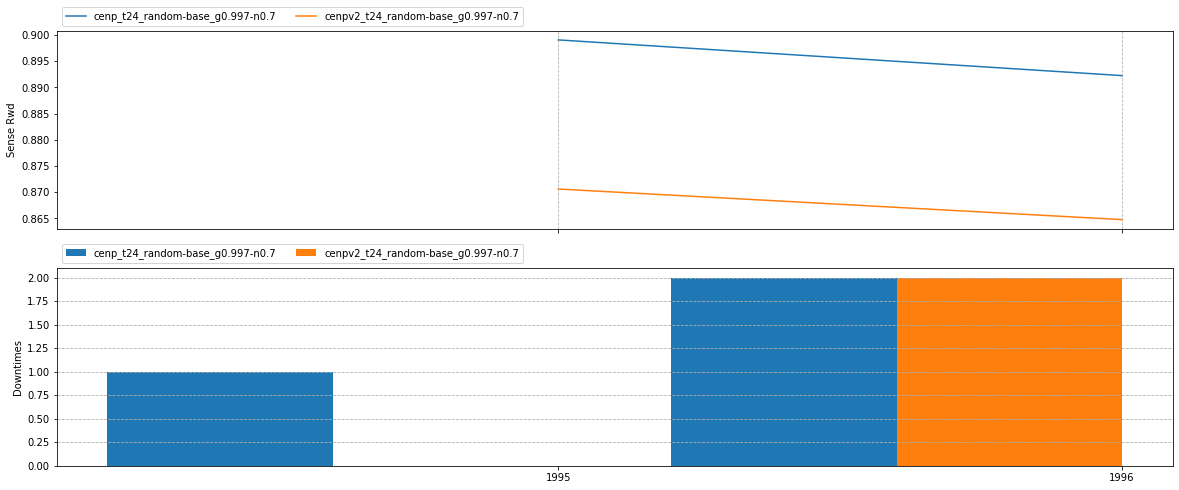

In [12]:
fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[20,8],
                        sharex=True)

# avg_reward_ax  = axs[0]
sense_reward_ax  = axs[0]
# enp_reward_ax  = axs[2]
downtimes_ax = axs[1]

seed = 324267
env_location = 'tokyo'
print(env_location)
# average_rwd = {}
# for experiment in exp_list:
#     yr_list = all_results[experiment][env_location].keys()
#     dummy_list = []
#     for year in yr_list:
#         dummy_list.append((year, all_results[experiment][env_location][year]['avg_rwd']))
#     average_rwd[experiment] = dummy_list

#     avg_reward_ax.plot(*zip(*average_rwd[experiment]), label = experiment)
#     avg_reward_ax.legend(loc="lower left",
#                        ncol=4,
#                        bbox_to_anchor=(0,1.0,1,1))
#     avg_reward_ax.set_ylabel("Total Rwd")

sense_rwd = {}
for experiment in exp_list:
    experiment_instance = results[experiment][seed][env_location]

    yr_list = experiment_instance.keys()
    dummy_list = []
    for year in yr_list:
        dummy_list.append((year, experiment_instance[year]['sense_reward_log'].mean()))
    sense_rwd[experiment] = dummy_list

    sense_reward_ax.plot(*zip(*sense_rwd[experiment]), label = experiment)
    sense_reward_ax.set_ylabel("Sense Rwd")    
    sense_reward_ax.legend(loc="lower left",
                       ncol=3,
                       bbox_to_anchor=(0,1.0,1,1))
# enp_rwd = {}
# for experiment in exp_list:
#     yr_list = all_results[experiment][env_location].keys()
#     dummy_list = []
#     for year in yr_list:
#         dummy_list.append((year, all_results[experiment][env_location][year]['enp_reward_log'].mean()))
#     enp_rwd[experiment] = dummy_list

#     enp_reward_ax.plot(*zip(*enp_rwd[experiment]), label = experiment)
#     enp_reward_ax.set_ylabel("ENP Rwd")

downtimes = {}
for experiment in exp_list:
    experiment_instance = results[experiment][seed][env_location]

    yr_list = experiment_instance.keys()
    dummy_list = []
    for year in yr_list:
        dummy_list.append((year, experiment_instance[year]['downtimes']))
    downtimes[experiment] = dummy_list

    xroot = np.array(list(experiment_instance.keys())) # label locations
    xoffset = exp_list.index(experiment)-1.5
    width = 0.8/len(exp_list)  # the width of the bars 
    
    downtime_values = [list(k) for k in zip(*downtimes[experiment])][1]
    downtimes_ax.bar(xroot+xoffset*width,downtime_values, width, label = experiment)
    
#     downtimes_ax.plot(*zip(*downtimes[experiment]), label = experiment)
    downtimes_ax.set_ylabel("Downtimes")

    
# avg_reward_ax.grid(which='major', axis='x', linestyle='--')
sense_reward_ax.grid(which='major', axis='x', linestyle='--')
# enp_reward_ax.grid(which='major', axis='x', linestyle='--')
# downtimes_ax.set_ylim([0,4])
downtimes_ax.grid(which='major', axis='y', linestyle='--')
downtimes_ax.set_xticks(list(experiment_instance.keys()));
downtimes_ax.legend(loc="lower left",
                       ncol=3,
                       bbox_to_anchor=(0,1,1,1))